## Exercise 1

Assume the lognormal model for the asset price $S_T$. Assumme $\sigma=0.2$ and $r=0.05$. Compute the price according to the Black-Scholes model of a put option with strike $K=5$ for the following set of parameters:
1. $T=0.00001, 0.4, 0.8,\ldots,10$
2. $S_0=0.0001,0.4, 0.8,\ldots,10$

Present the results on the 3D-plot. Comment on the results for very small $T$.

In [65]:
TimeToMaturity=c(0.0001,1:25/2.5)
S0=c(0.0001,1:25/2.5)

compute_BS<-function(T,S0){
    r=0.05
    sigma=0.2
    K=5
    
    a=(log(K/S0)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
    V0= (K*exp(-r*T)*pnorm(a)-S0*pnorm(a-sigma*sqrt(T)))
    return(V0)
}



v0=outer(TimeToMaturity,S0, compute_BS)
persp(TimeToMaturity,S0,v0, theta = -120, phi = 15, ticktype='detailed',col=terrain.colors(max(v0)+1)[v0[-1,-1]+1])

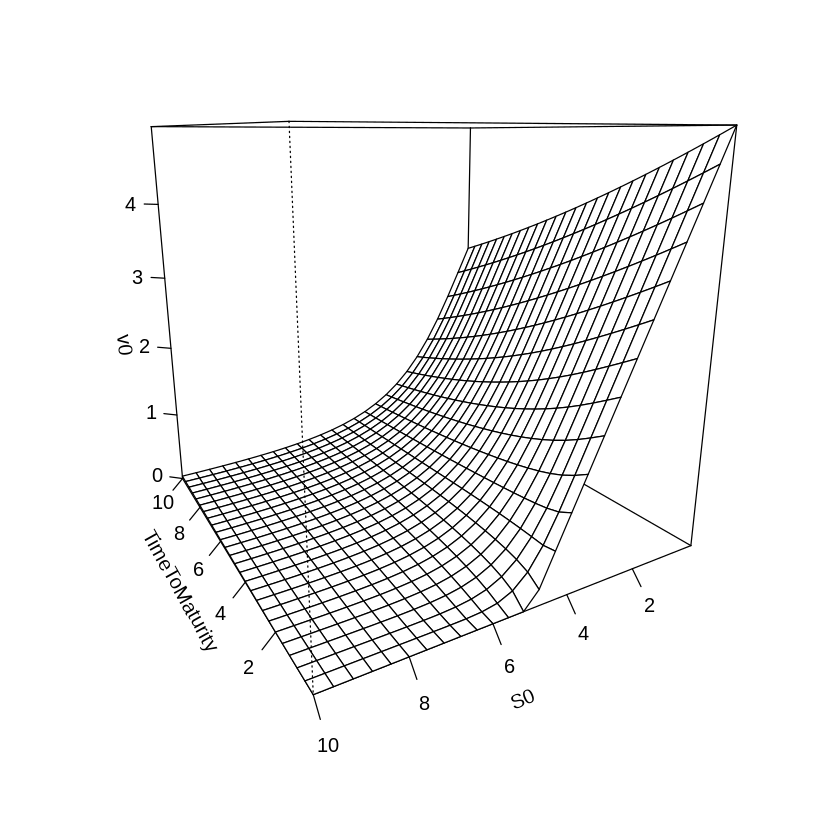

In [66]:
persp(TimeToMaturity,S0,v0, theta = -120, phi = 15, ticktype='detailed',)

## Exercise 2
Prove the Black Scholes formula for the call option.

## Section 3.5

# Exercise 3.23

In [46]:
#Inputs

S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
rg <- seq(-0.02,0.10,0.02)

#Compute BS
compute_BS<-function(T,S0,K,r,sigma){
  
    a=(log(K/S0)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
    V0= (K*exp(-r*T)*pnorm(a)-S0*pnorm(a-sigma*sqrt(T)))
    return(V0)
}
K=S0*(1+rg)
V0<- lapply(K,compute_BS,T=T,S0=S0,r=r,sigma=sigma)

#output
V0

[[1]]
[1] 0.07449881

[[2]]
[1] 0.0839303

[[3]]
[1] 0.09398094

[[4]]
[1] 0.1046365

[[5]]
[1] 0.1158797

[[6]]
[1] 0.1276907

[[7]]
[1] 0.1400479

# Exercise 3.24

In [60]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
rg <- 0.04

m1 <- 1e4
m2 <- 1e5
m3 <- 1e6

#calculate strike
K=S0*(1+rg)

#calculate returns
eps_1 <- rnorm(m1) 
S1 <- S0*exp(r*T-0.5*sigma^2*T+sigma*sqrt(T)*eps_1)

eps_2 <- rnorm(m2) 
S2 <- S0*exp(r*T-0.5*sigma^2*T+sigma*sqrt(T)*eps_2)

eps_3 <- rnorm(m3) 
S3 <- S0*exp(r*T-0.5*sigma^2*T+sigma*sqrt(T)*eps_3)
X1 <- pmax(K-S1,0)
X2 <- pmax(K-S2,0)
X3 <- pmax(K-S3,0)

#calculate BS
v01 <- exp(-r*T)*mean(X1)
v02 <- exp(-r*T)*mean(X2)
v03 <- exp(-r*T)*mean(X3)
c(v01,v02,v03)

[1] 0.1055710 0.1049544 0.1045753

# Excerise 3.25
On the blackboard


# Exercise 3.27

[1] 0.1062074

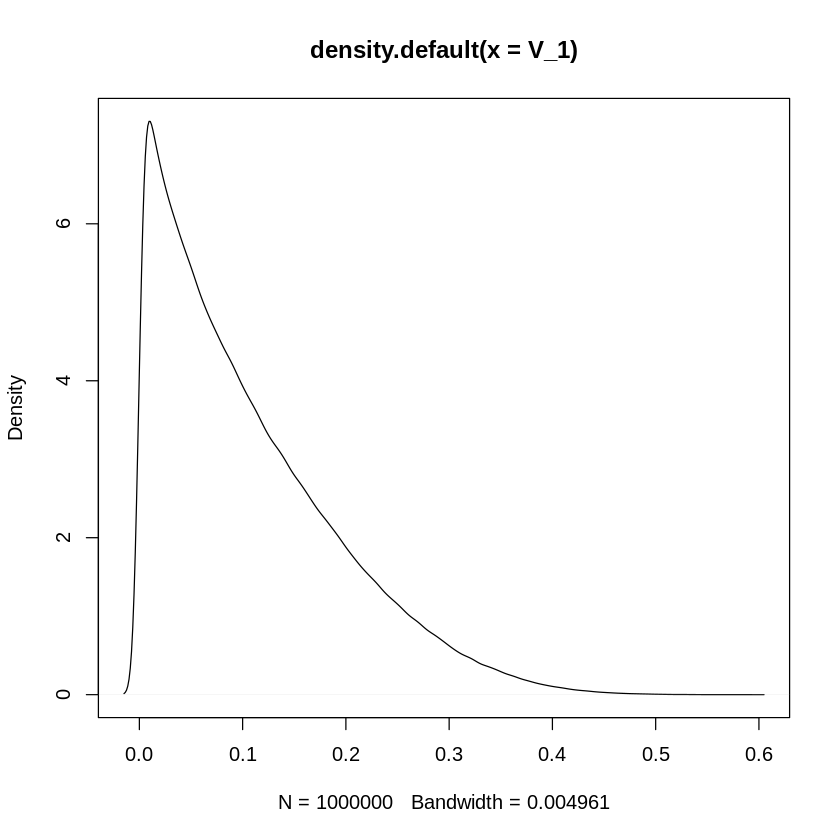

In [47]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
T_1<-0.5
rg <- 0.04

m <- 1e6

#calculate strike
K=S0*(1+rg)

#calculate returns
eps <- rnorm(m) 
S_1<-S0*exp(r*T_1-0.5*sigma^2*T_1+sigma*sqrt(T_1)*eps)

#calculate BS
V_1 <- compute_BS(T=T-T_1,S0=S_1,K=K,r=r,sigma=sigma)


plot(density(V_1))

mean(V_1)

# Exercise 3.28

On the blackboard

# Exercise 3.29

In [64]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
rg <- 0.04
rc <- c(0.09,0.12,0.15,0.5)

#Calc strike
Kp=S0*(1+rg)
Kc=S0*(1+rc)
#calc BS
ag <- (log(1+rg)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
ac <- (log(1+rc)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
v_0 <- compute_BS(T=T,S0=S0,K=Kp,r=r,sigma=sigma)-
    sapply(Kc,compute_BS,T=T,S0=S0,r=r,sigma=sigma)-(S0-Kc*exp(-r*T))
v_0

[1] 0.02861964 0.03860797 0.04747631 0.09588376

## Exercise - Greeks

Greeks are derivatives of the value of an option with respect to the parameters of the B-S-model. Assume a put option with strike K=1.04, r=0.03, T=1 and sigma=0.25. Approximate the derivative of $V_0$ with respect to $S_0$, r, $\sigma$ and T and comment on sign of it.

In [58]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
K <- 1.04

S0_h <- 1.01
sigma_h <- 0.26
r_h <- 0.04
T_h <- 1.01

#Compute BS
V0 <- compute_BS(T=T,S0=S0,K=K,r=r,sigma=sigma)
print(paste("V0 is",V0))

#Compute BS for S0_h
V0_h <- compute_BS(T=T,S0=S0_h,K=K,r=r,sigma=sigma)
print(paste("New V0 is",V0_h))
print(paste("Approximation of delta is",(V0_h-V0)/0.01))

a=(log(K/S0)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
print(paste("Real delta is",-pnorm(a-sigma*sqrt(T))))

      

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.100066677682884"
[1] "Approximation of delta is -0.456980521131506"
[1] "Real delta is -0.464891783874423"


In [50]:
print(paste("V0 is",V0))

#Compute BS for r_h
V0_h <-compute_BS(T=T,S0=S0,K=K,r=r_h,sigma=sigma)
print(paste("New V0 is",V0_h))
print(paste("Rho is",(V0_h-V0)/0.01))

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.0990486933611043"
[1] "Rho is -0.55877895330948"


In [51]:
print(paste("V0 is",V0))

#Compute BS for sigma
V0_h <- compute_BS(T=T,S0=S0,K=K,r=r,sigma=sigma_h)
print(paste("New V0 is",V0_h))
print(paste("Vega is",(V0_h-V0)/0.01))

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.108609293288309"
[1] "Vega is 0.397281039410985"


In [52]:
print(paste("V0 is",V0))

#Compute BS for T
V0_h <-compute_BS(T=T_h,S0=S0,K=K,r=r,sigma=sigma)
print(paste("New V0 is",V0_h))
print(paste("Theta is",(V0_h-V0)/0.01))

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.104961160926362"
[1] "Theta is 0.0324678032162573"
